In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
from collections import defaultdict
import functions

In [2]:
# Set path to the current working directory
current_directory = os.getcwd()
data_path = os.path.join(current_directory, 'pointclouds-500')

# List all .xyz files in the directory
file_paths = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.xyz')]

# looping over files list to extract xyz values
point_cloud = []
for file in file_paths:
    df = pd.read_csv(file, delimiter=" ", names=['x', 'y', 'z'])
    x_values = df['x'].values
    y_values = df['y'].values
    z_values = df['z'].values
    point_cloud.append(np.column_stack((x_values, y_values, z_values)))

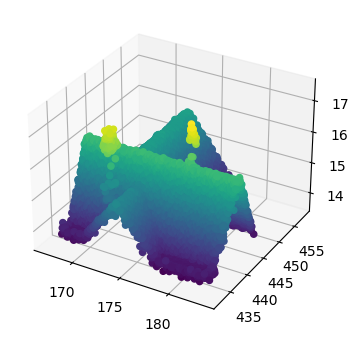

In [3]:
# visualise elements individually in 3D space (optional)
t = int(input("Object visualization query: "))  # the item no. for 3D viz
x_data = point_cloud[t][:, 0]
y_data = point_cloud[t][:, 1]
z_data = point_cloud[t][:, 2]

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, c=z_data, alpha=1)
plt.show()


In [4]:
def pairplot_features(dataframe):
    sns.set(style="ticks")
    g = sns.pairplot(dataframe, hue='label')
    plt.suptitle("Pairplot of Features", y=1.02, fontsize=20)
    plt.legend(loc='upper right')
    plt.show()

In [5]:
features = functions.Features(point_cloud)
display(features.df)
df_features = features.df

c:\Users\ppant\Documents\TU Delft\2024 Q3\GEO5017\GEO5017_Group_13\functions.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][0:100] = 'building'
c:\Users\ppant\Documents\TU Delft\2024 Q3\GEO5017\GEO5017_Group_13\functions.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][100:200] = 'car'
c:\Users\ppant\Documents\TU Delft\2024 Q3\GEO5017\GEO5017_Group_13\functions.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,max_heights,ground_area,density,projected_bb,average_height,planarity,label
0,19.730000,48.731934,0.135232,0.009167,18.003383,0.199947,building
1,8.470000,64.715485,0.112223,0.007857,7.385178,0.308227,building
2,15.570000,273.662312,0.228969,0.008301,12.986387,0.419449,building
3,16.469999,354.430061,0.243781,0.007247,13.856272,0.397191,building
4,9.750000,520.882345,0.223818,0.006174,7.823214,0.364260,building
...,...,...,...,...,...,...,...
495,11.540000,40.565323,0.106486,0.007500,7.438339,0.580601,tree
496,15.170000,106.506569,0.198018,0.007197,9.659321,0.561576,tree
497,11.110000,36.537662,0.213788,0.007708,7.443952,0.389778,tree
498,18.910000,40.327366,0.228704,0.008000,12.962448,0.455015,tree


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


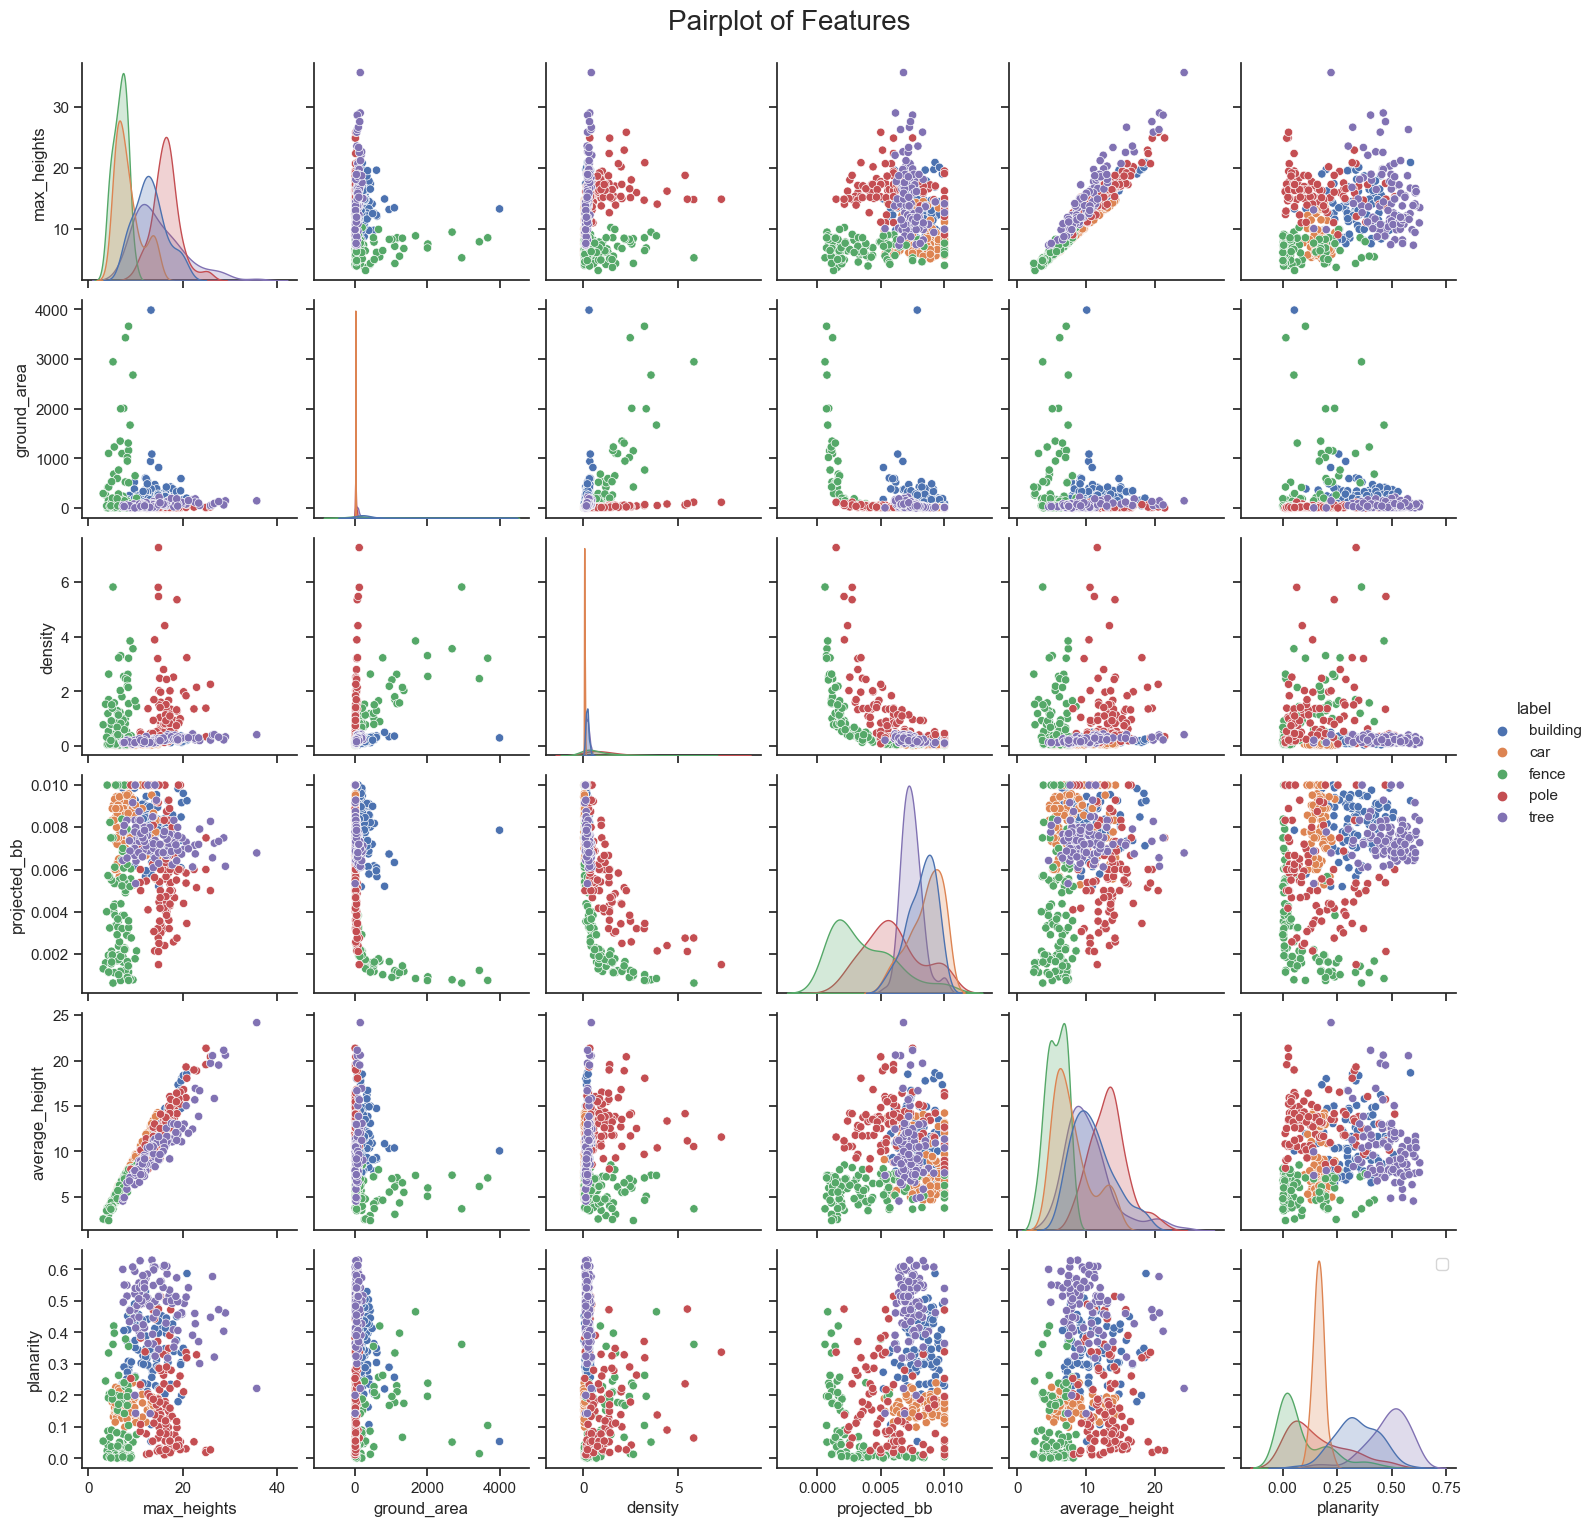

In [6]:
pairplot_features(df_features)

In [7]:
# separate the df_features (X) and labels (y) to train and test the model
X = df_features.drop('label', axis=1)
y = df_features['label']


In [8]:
# Find out the most important features per classifier
svm_features = functions.SVM_classifier(X,y, 0.2, feat_importance=True)
rf_features = functions.RF_classifier(X, y, 0.2, feat_importance=True)

Feature Importance of SVM:
density: 0.088
projected_bb: 0.092
ground_area: 0.144
average_height: 0.174
max_heights: 0.24
planarity: 0.32

Feature Importance of RF:
average_height: -0.008
projected_bb: 0.094
max_heights: 0.11
density: 0.12
planarity: 0.164
ground_area: 0.274



In [9]:
# Drop the least important features from the training data
X_updated_svm = df_features.drop(['label', 'density', 'projected_bb'], axis=1)
X_updated_rf = df_features.drop(['label', 'average_height', 'projected_bb'], axis=1)

In [10]:
functions.HyperparameterSVM(X, y, 0.2)
functions.HyperparameterSVM(X_updated_svm, y, 0.2)

c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The best accuracy is 0.99 with:
 C:5
 kernel:rbf
 maximum iterations:-1
 decision function shape:ovo
 class weights:None
The best mean per class accuracy is 0.993 with: 
 C:5
 kernel:rbf
 maximum iterations:-1
 decision function shape:ovo
 class weights: None


c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ppant\anaconda3\envs\dsaie\lib\site-packages\sklearn\svm\_base.py:299: Conv

The best accuracy is 0.94 with:
 C:1
 kernel:rbf
 maximum iterations:-1
 decision function shape:ovo
 class weights:balanced
The best mean per class accuracy is 0.941 with: 
 C:1
 kernel:rbf
 maximum iterations:-1
 decision function shape:ovo
 class weights: balanced


In [13]:
functions.HyperparameterRF(X, y, 0.2)
functions.HyperparameterRF(X_updated_rf, y, 0.2)

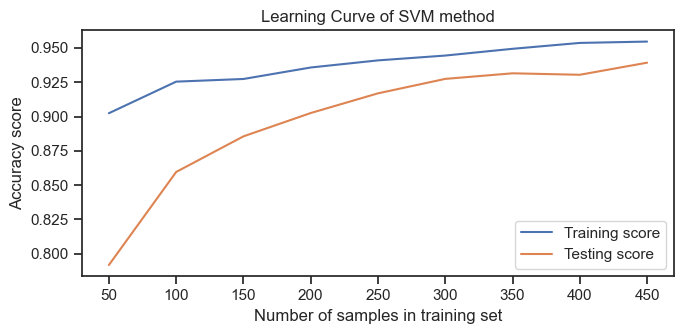

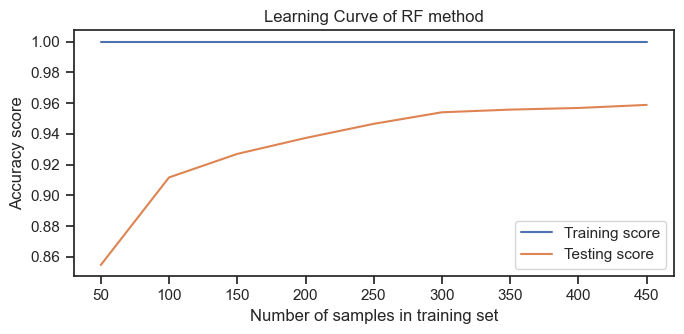

In [12]:
functions.learning_curve_viz(X, y, 'SVM')
functions.learning_curve_viz(X, y, 'RF')

In [ ]:
# Own function for learning curve visualization
# Requirements: • X axis: training set size (0-500)
# Y axis: classification error 
# Two curves need to be present:
# Apparent error rate (on training set)
# True error rate (approximated on testing set)
# For each experiment, run multiple times so that the output curves are smooth

# Pseudo code: check_interval = 0.1 (can also be smaller or larger) 
# for i in range(1/ check_interval -1): 
# train test split ratio = (i+1)* check_interval
# split the data accordingly train and test model on the corresponding sets (multiple times)
# record the (averaged) error rates
# Plot the performances as curves

